<a href="https://colab.research.google.com/github/HARSHA-1119/minor-project/blob/main/MINOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3363475496.py:3: UserWarning: Input line 2 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  male = np.loadtxt(r"/content/nhanes_adult_male_bmx_2020.csv", delimiter=',', skiprows=1, dtype=str)
/tmp/ipython-input-3363475496.py:4: UserWarning: Input line 2 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  

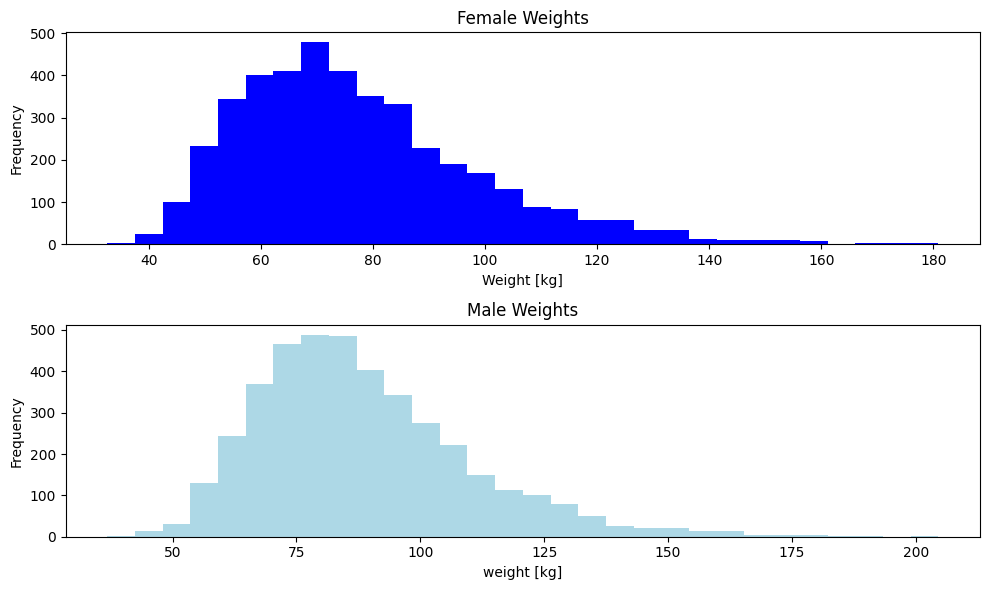

In [ ]:
import numpy as np

male = np.loadtxt(r"/content/nhanes_adult_male_bmx_2020.csv", delimiter=',', skiprows=1, dtype=str)
female = np.loadtxt(r"/content/nhanes_adult_female_bmx_2020.csv", delimiter=',', skiprows=1, dtype=str)

import matplotlib.pyplot as plt

male_weights = male[1:, 0].astype(float)
female_weights = female[1:, 0].astype(float)

#histograms
plt.figure(figsize=(10, 6))

#histograms for female weights
plt.subplot(2,1,1)
plt.hist(female_weights, bins=30, color='blue')
plt.title('Female Weights')
plt.xlabel('Weight [kg]')
plt.ylabel('Frequency')

#histograms for male weights
plt.subplot(2,1,2)
plt.hist(male_weights, bins=30, color='lightblue')
plt.title('Male Weights')
plt.xlabel('weight [kg]')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2556350274.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights], labels=['Female'])


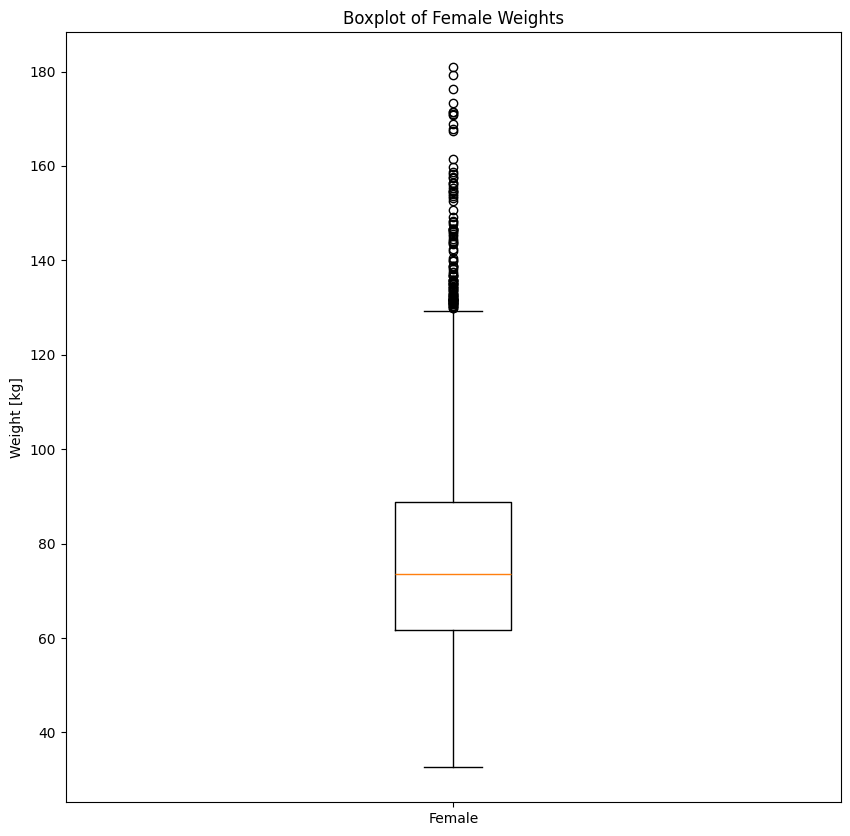

In [ ]:
#boxplot
plt.figure(figsize=(10, 10))
plt.boxplot([female_weights], labels=['Female'])
plt.title('Boxplot of Female Weights')
plt.ylabel('Weight [kg]')
plt.show()

/tmp/ipython-input-1996224175.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_weights], labels=['Male'])


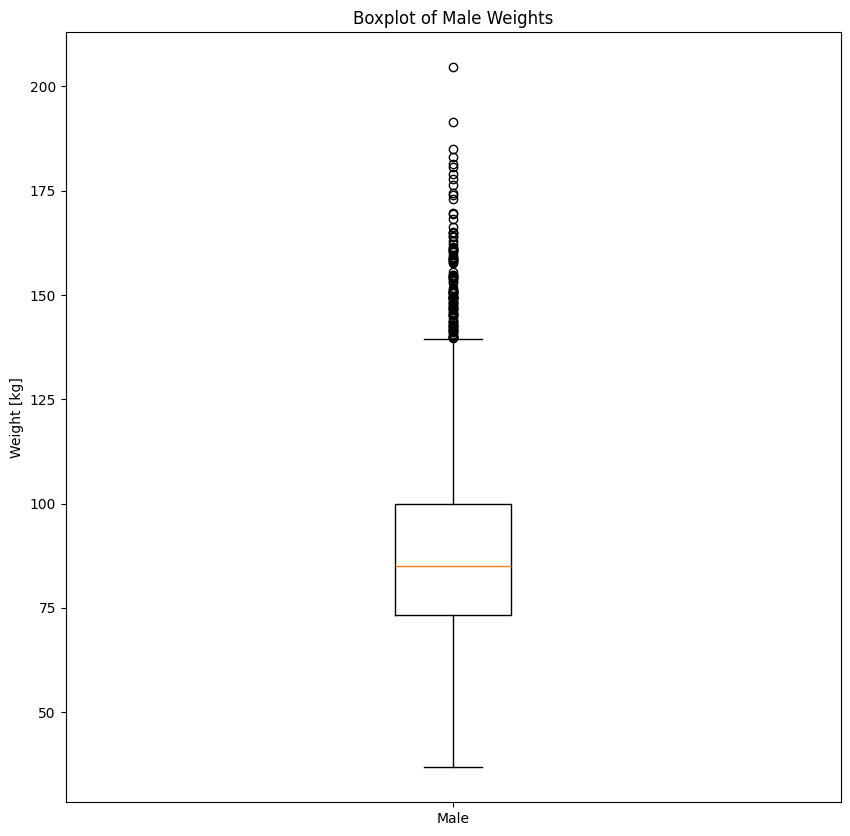

In [ ]:
#boxplot
plt.figure(figsize=(10, 10))
plt.boxplot([male_weights], labels=['Male'])
plt.title('Boxplot of Male Weights')
plt.ylabel('Weight [kg]')
plt.show()

/tmp/ipython-input-1625855340.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])


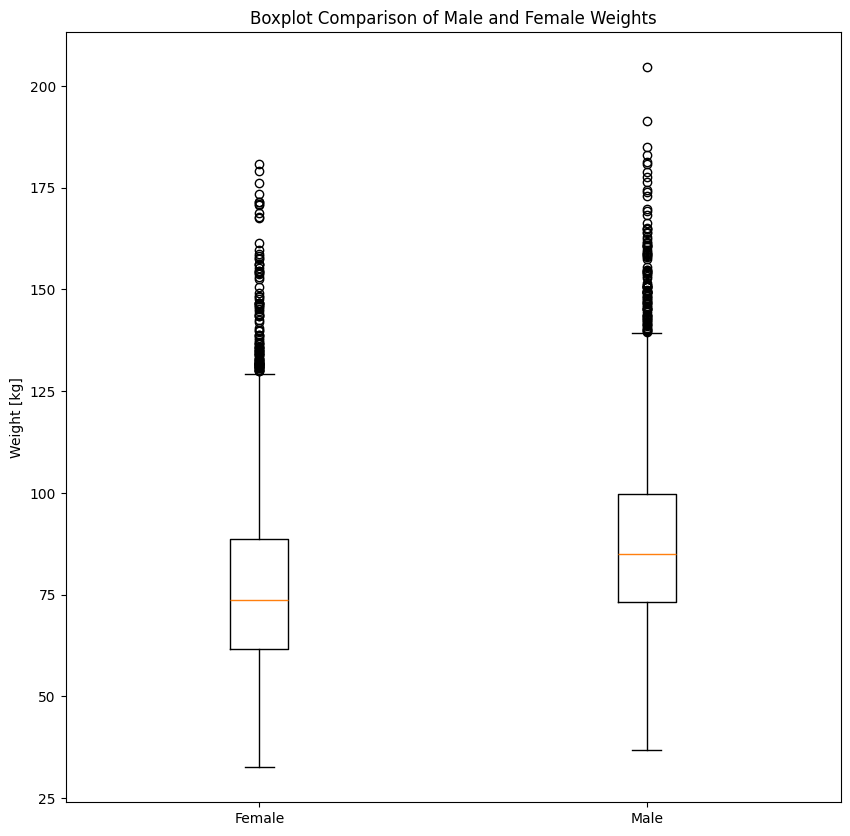

In [ ]:
#boxplot comparison
plt.figure(figsize=(10, 10))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Boxplot Comparison of Male and Female Weights')
plt.ylabel('Weight [kg]')
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

def summary_stats(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data),
        'skewness': skew(data),
        'kurtosis': kurtosis(data)
    }

male_status = summary_stats(male_weights)
female_status = summary_stats(female_weights)

print("Male Weight Status:", male_status)
print("Female Weight Status:", female_status)

Male Weight Status: {'mean': np.float64(88.36454300416565), 'median': np.float64(85.0), 'std_dev': np.float64(21.418936717962495), 'skewness': np.float64(0.9842810741662347), 'kurtosis': np.float64(1.4742884754078238)}
Female Weight Status: {'mean': np.float64(77.40379057095475), 'median': np.float64(73.6), 'std_dev': np.float64(21.54250829019315), 'skewness': np.float64(1.03336107186799), 'kurtosis': np.float64(1.4009683480659731)}


In [ ]:
#height(cm) into height(m)
female_height_in_m = female[1:, 1].astype(float) / 100
female_bmi = female[1:, 0].astype(float) / (female_height_in_m ** 2)

#bmi to columns
female = np.column_stack([female[1:], female_bmi])
print("Updated female matrix shape:", female.shape)

female = female.astype(float)
new_female = (female - female.mean(axis=0)) / female.std(axis=0)
print("New female matrix (5 rows):")
print(new_female[:5])

Updated female matrix shape: (4221, 8)
New female matrix (5 rows):
[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


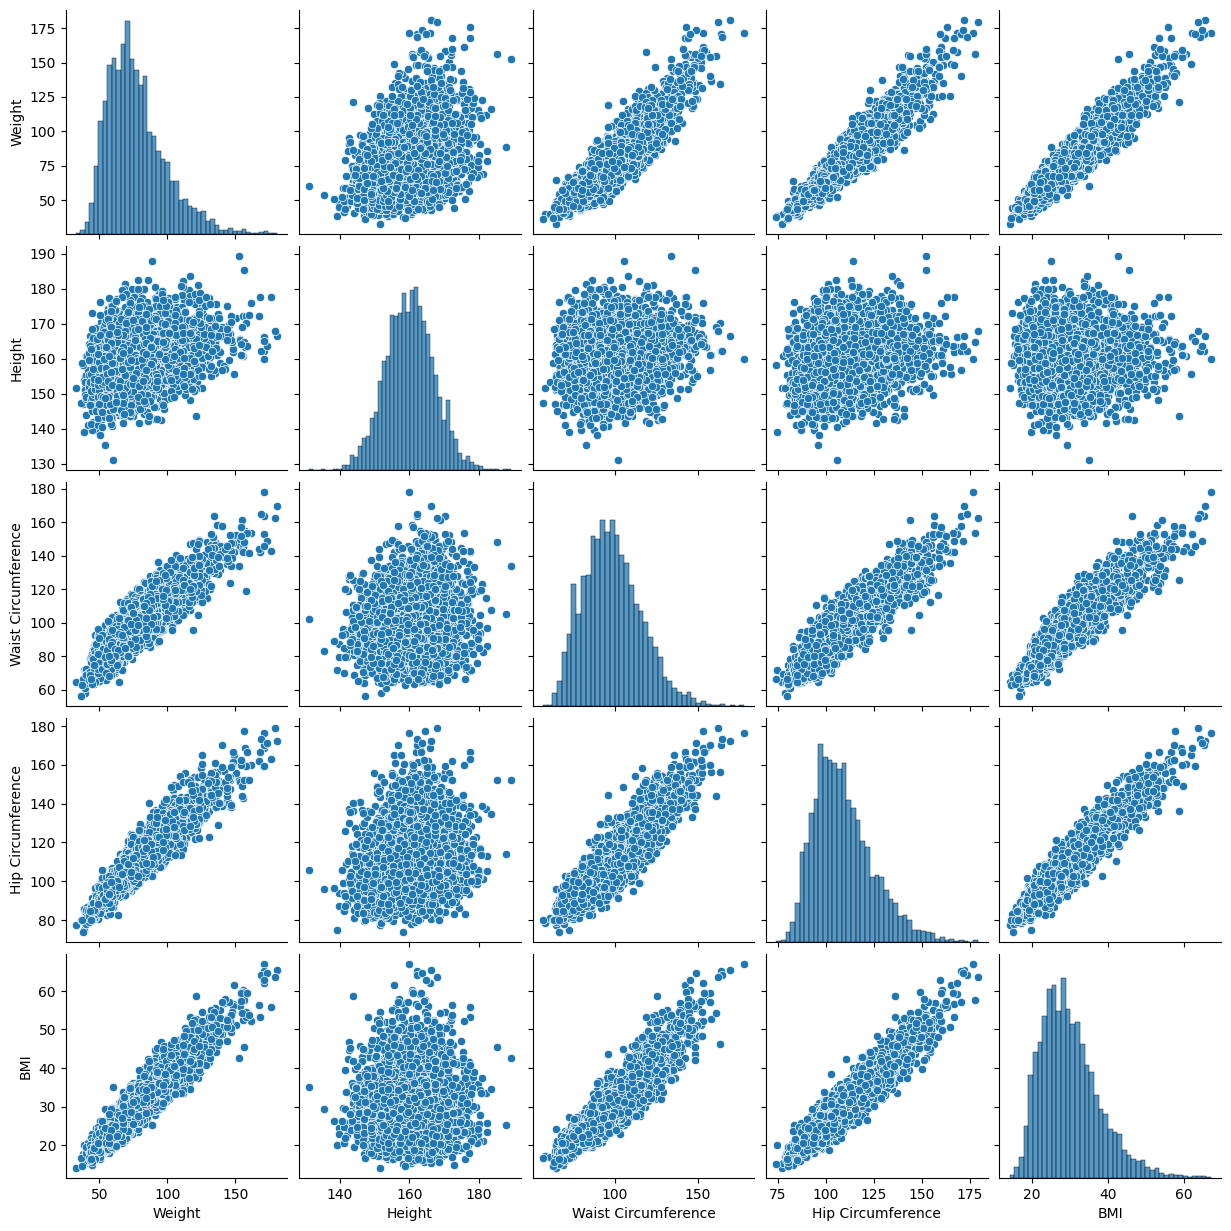

pearson matrix:                        Weight    Height  Waist Circumference  \
Weight               1.000000  0.345496             0.904550   
Height               0.345496  1.000000             0.126547   
Waist Circumference  0.904550  0.126547             1.000000   
Hip Circumference    0.946553  0.202895             0.897407   
BMI                  0.945900  0.033077             0.921198   

                     Hip Circumference       BMI  
Weight                        0.946553  0.945900  
Height                        0.202895  0.033077  
Waist Circumference           0.897407  0.921198  
Hip Circumference             1.000000  0.944199  
BMI                           0.944199  1.000000  
spearman matrix:                        Weight    Height  Waist Circumference  \
Weight               1.000000  0.338860             0.900169   
Height               0.338860  1.000000             0.108587   
Waist Circumference  0.900169  0.108587             1.000000   
Hip Circumference   

In [ ]:
import seaborn as sns
import pandas as pd

#dataframe for scatterplot matrix and changing columns to female array
fem_df = pd.DataFrame(female, columns=['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length','Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI'])

#scatterplot matrix
sns.pairplot(fem_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']])
plt.show()

print("pearson matrix:",fem_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']].corr())
print("spearman matrix:",fem_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']].corr(method='spearman'))

/tmp/ipython-input-3881707357.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_waist_to_height, male_waist_to_height, female_waist_to_hip, male_waist_to_hip],labels=['Female Waist or Height', 'Male Waist or Height', 'Female Waist or Hip', 'Male Waist or Hip'])


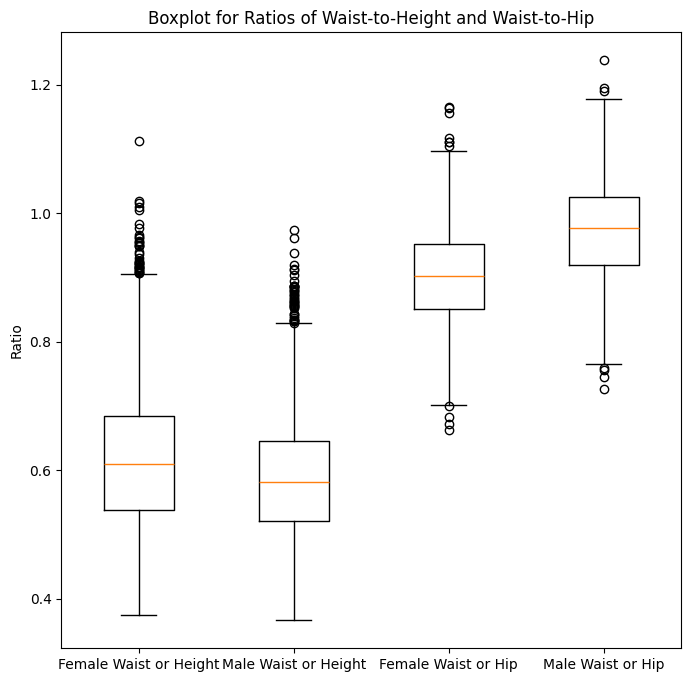

In [ ]:
# male to numerical array
# remove first row (containing rows)
male = male[1:].astype(float)

# Ratios of waist-to-height and waist-to-hip
male_waist_to_height = male[:, 6] / male[:, 1]
male_waist_to_hip = male[:, 6] / male[:, 5]

female_waist_to_height = female[:, 6] / female[:, 1]
female_waist_to_hip = female[:, 6] / female[:, 5]

# columns adding
male = np.column_stack([male, male_waist_to_height, male_waist_to_hip])
female = np.column_stack([female, female_waist_to_height, female_waist_to_hip])

# boxplot for ratios of waist-to-height and waist-to-hip
plt.figure(figsize=(8, 8))
plt.boxplot([female_waist_to_height, male_waist_to_height, female_waist_to_hip, male_waist_to_hip],labels=['Female Waist or Height', 'Male Waist or Height', 'Female Waist or Hip', 'Male Waist or Hip'])
plt.title('Boxplot for Ratios of Waist-to-Height and Waist-to-Hip')
plt.ylabel('Ratio')
plt.show()

In [ ]:
# Get indices of 5 lowest and 5 highest BMI
lowest_bmi_indices = np.argsort(female_bmi)[:5]
highest_bmi_indices = np.argsort(female_bmi)[-5:]

print("Standardized body measurements for 5 individuals with lowest BMI:")
print(female[lowest_bmi_indices])

print("Standardized body measurements for 5 individuals with highest BMI:")
print(female[highest_bmi_indices])

Standardized body measurements for 5 individuals with lowest BMI:
[[ 32.6        151.5         32.4         33.4         20.4
   77.3         64.7         14.20340054   0.42706271   0.83699871]
 [ 36.9        158.8         32.          38.4         19.
   80.2         62.7         14.63273036   0.39483627   0.78179551]
 [ 44.3        172.9         37.5         39.          20.
   83.          68.8         14.81882399   0.39791787   0.82891566]
 [ 37.7        158.3         35.5         38.8         19.8
   74.          66.2         15.04456103   0.4181933    0.89459459]
 [ 42.7        166.4         35.8         38.7         20.3
   80.6         68.7         15.42130871   0.41286058   0.85235732]]
Standardized body measurements for 5 individuals with highest BMI:
[[168.9        162.2         40.4         34.          46.
  173.3        164.9         64.19895366   1.01664612   0.95152914]
 [173.4        163.7         40.          33.5         51.5
  171.4        149.          64.7070699  